In [1]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import pyplot
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from matplotlib import rc
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error 
import datetime
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

import matplotlib
# matplotlib.rcParams['font.family'] = 'Malgun Gothic'  # windows
matplotlib.rcParams['font.family'] = 'AppleGothic'  # Mac
matplotlib.rcParams['font.size'] = 15  # 글자크기
matplotlib.rcParams['axes.unicode_minus'] = False # 한글 폰트 사용시 마이너스 꺠지지않게 해줌

In [2]:
df = pd.read_csv('./datasets/강남.csv')
df

,자치구,계약일,건물면적(㎡),층,KOSPI종가,Fed기준금리,국제유가(Dubai)($/배럴),부동산거래량,국고채5년(평균),국고채10년(평균),...,BOK기준금리,건물연식,GDP대비가계부채비율,환율종가,선행지수순환변동치,EPU,장단기금리spread,금값종가,LTV,물건금액(만원)
0,강남구,2016-01-01,50.67,4,1961.310059,0.34,26.9,9894,1.77,2.03,...,1.50,34,83.3,1175.45,99.6,177.148845,0.14,1060.74,0.7,87000
1,송파구,2016-01-01,84.93,11,1961.310059,0.34,26.9,9894,1.77,2.03,...,1.50,21,83.3,1175.45,99.6,177.148845,0.14,1060.74,0.7,46450
2,서초구,2016-01-01,134.36,12,1961.310059,0.34,26.9,9894,1.77,2.03,...,1.50,11,83.3,1175.45,99.6,177.148845,0.14,1060.74,0.7,94000
3,용산구,2016-01-02,114.48,7,1961.310059,0.34,26.9,9894,1.77,2.03,...,1.50,15,83.3,1175.45,99.6,177.148845,0.14,1060.74,0.7,62500
4,강남구,2016-01-02,110.39,6,1961.310059,0.34,26.9,9894,1.77,2.03,...,1.50,27,83.3,1175.45,99.6,177.148845,0.14,1060.74,0.7,133000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100346,서초구,2022-12-31,84.98,23,2236.399902,4.10,77.2,3698,3.59,3.54,...,3.25,16,105.0,1260.92,99.1,169.662386,0.39,1824.40,0.0,194000
100347,강남구,2022-12-31,76.79,2,2236.399902,4.10,77.2,3698,3.59,3.54,...,3.25,43,105.0,1260.92,99.1,169.662386,0.39,1824.40,0.0,184000
100348,서초구,2022-12-31,152.33,9,2236.399902,4.10,77.2,3698,3.59,3.54,...,3.25,18,105.0,1260.92,99.1,169.662386,0.39,1824.40,0.0,250000
100349,송파구,2022-12-31,84.71,11,2236.399902,4.10,77.2,3698,3.59,3.54,...,3.25,34,105.0,1260.92,99.1,169.662386,0.39,1824.40,0.2,138000


In [3]:
# OLS를 통해 의미 있는 컬럼 추출
df = df[['자치구','계약일','건물면적(㎡)', '층', 'Fed기준금리', '장단기금리spread', '건물연식', 'LTV', '물건금액(만원)']]

In [4]:
df

,자치구,계약일,건물면적(㎡),층,Fed기준금리,장단기금리spread,건물연식,LTV,물건금액(만원)
0,강남구,2016-01-01,50.67,4,0.34,0.14,34,0.7,87000
1,송파구,2016-01-01,84.93,11,0.34,0.14,21,0.7,46450
2,서초구,2016-01-01,134.36,12,0.34,0.14,11,0.7,94000
3,용산구,2016-01-02,114.48,7,0.34,0.14,15,0.7,62500
4,강남구,2016-01-02,110.39,6,0.34,0.14,27,0.7,133000
...,...,...,...,...,...,...,...,...,...
100346,서초구,2022-12-31,84.98,23,4.10,0.39,16,0.0,194000
100347,강남구,2022-12-31,76.79,2,4.10,0.39,43,0.0,184000
100348,서초구,2022-12-31,152.33,9,4.10,0.39,18,0.0,250000
100349,송파구,2022-12-31,84.71,11,4.10,0.39,34,0.2,138000


In [5]:
# Train : 2016-2020
# Test : 2021-2022

# 시계열
df['계약일'] = pd.to_datetime(df['계약일'])

train_df = df.loc[df['계약일'] < '2021']
test_df = df.loc[df['계약일'] >= '2021']

In [6]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [7]:
X_train = train_df.iloc[ :, 2 : -1]  
y_train = train_df.iloc[ :, -1]

In [8]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
y_train = np.log10(y_train)

# RandomForest

In [9]:
# 랜덤 포레스트 회귀 모델 초기화
model = RandomForestRegressor(random_state =1 , n_jobs = -1)

# 모델 학습
model.fit(X_train, y_train)


# Test set에 모델 적용 및 예측 평가
X_test = test_df.iloc[ :, 2 : -1]  # target_column은 예측하고자 하는 종속 변수 컬럼명
y_test = test_df.iloc[ :, -1]
X_test_scaled = scaler.transform(X_test)
y_test_scaled = np.log10(y_test)
test_predictions = model.predict(X_test_scaled)
test_mse = mean_squared_error(y_test_scaled, test_predictions)
print("Test set MSE:", test_mse)
print("Test set RMSE:", np.sqrt(test_mse))
print('Test set r2_score :', model.score(X_test_scaled, y_test_scaled))

Test set MSE: 0.025481539139479835
Test set RMSE: 0.15962938056473136
Test set r2_score : 0.7984444371022866


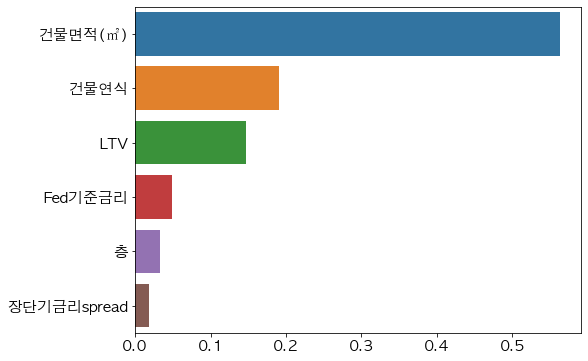

In [10]:
# test_df
importance = model.feature_importances_
# 상위 20개 변수 추출
top_features = pd.Series(importance, index=test_df.iloc[:,2:-1].columns).nlargest(20)
top = top_features.sort_values(ascending=False)[:20]
# 변수 중요도 시각화
plt.figure(figsize=(8, 6))
sns.barplot(x=top, y=top.index)
plt.show()

# DecisionTree

In [11]:
# 랜덤 포레스트 회귀 모델 초기화
model = DecisionTreeRegressor(random_state =1)

# 모델 학습
model.fit(X_train, y_train)

# Test set에 모델 적용 및 예측 평가
X_test = test_df.iloc[ :, 2 : -1]  # target_column은 예측하고자 하는 종속 변수 컬럼명
y_test = test_df.iloc[ :, -1]
X_test_scaled = scaler.transform(X_test)
y_test_scaled = np.log10(y_test)
test_predictions = model.predict(X_test_scaled)
test_mse = mean_squared_error(y_test_scaled, test_predictions)
print("Test set MSE:", test_mse)
print("Test set RMSE:", np.sqrt(test_mse))
print('Test set r2_score :', model.score(X_test_scaled, y_test_scaled))

Test set MSE: 0.033302544504147887
Test set RMSE: 0.18248984767418677
Test set r2_score : 0.7365813318136677


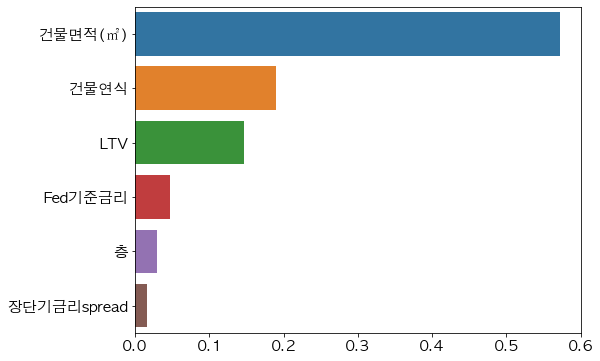

In [12]:
# test_df
importance = model.feature_importances_
# 상위 20개 변수 추출
top_features = pd.Series(importance, index=test_df.iloc[:,2:-1].columns).nlargest(20)
top = top_features.sort_values(ascending=False)[:20]
# 변수 중요도 시각화
plt.figure(figsize=(8, 6))
sns.barplot(x=top, y=top.index)
plt.show()

# XGBoost

In [13]:
import xgboost as xgb
# 랜덤 포레스트 회귀 모델 초기화
model = xgb.XGBRegressor(random_state =1)

# 모델 학습
model.fit(X_train, y_train)

# Test set에 모델 적용 및 예측 평가
X_test = test_df.iloc[ :, 2 : -1]  # target_column은 예측하고자 하는 종속 변수 컬럼명
y_test = test_df.iloc[ :, -1]
X_test_scaled = scaler.transform(X_test)
y_test_scaled = np.log10(y_test)
test_predictions = model.predict(X_test_scaled)
test_mse = mean_squared_error(y_test_scaled, test_predictions)
print("Test set MSE:", test_mse)
print("Test set RMSE:", np.sqrt(test_mse))
print('Test set r2_score :', model.score(X_test_scaled, y_test_scaled))

Test set MSE: 0.02166806431416362
Test set RMSE: 0.14720076193472512
Test set r2_score : 0.8286085123885395


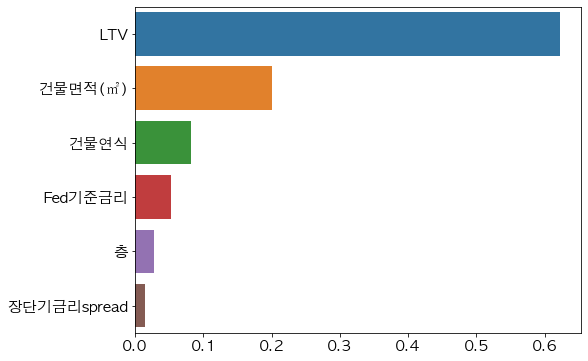

In [14]:
# test_df
importance = model.feature_importances_
# 상위 20개 변수 추출
top_features = pd.Series(importance, index=test_df.iloc[:,2:-1].columns).nlargest(20)
top = top_features.sort_values(ascending=False)[:20]
# 변수 중요도 시각화
plt.figure(figsize=(8, 6))
sns.barplot(x=top, y=top.index)
plt.show()